# **Setup**

* https://github.com/nicknochnack/ImageClassification
* https://www.youtube.com/watch?v=19LQRx78QVU

In [1]:
import os
import urllib.request
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

# **Remove dodgy images**

In [2]:
import cv2
import imghdr

C:\Users\aksha\AppData\Local\Temp\ipykernel_60172\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Data Import**

In [6]:
# Download Data Folder 
# urllib.request.urlretrieve('https://github.com/nicknochnack/ImageClassification/tree/main/data','data')

# Create Image Dataset From Folder
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
print(data_iterator)

batch = data_iterator.next()
# print(batch)

# **Data Exploration**

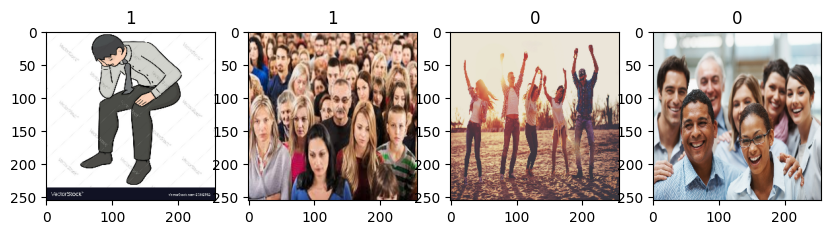

In [8]:
fig, ax = plt.subplots(1,4,figsize=(10,10))
for i, image in enumerate(batch[0][0:4]):
    ax[i].imshow(image.astype(int))
    ax[i].title.set_text(batch[1][i])

# **Data Processing**

## **Scaling**

In [9]:
print(batch[0].shape)
print(batch[0][0].shape)
print(batch[0][0][0].shape)

(32, 256, 256, 3)
(256, 256, 3)
(256, 3)


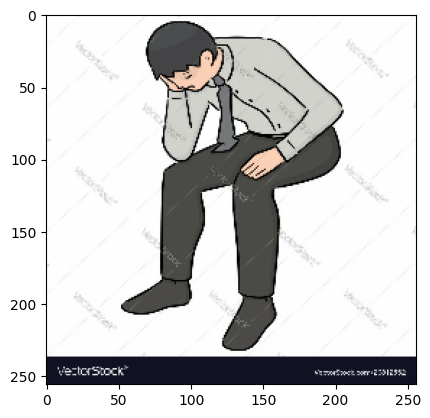

In [10]:
plt.imshow(batch[0][0]/256)

In [11]:
data = data.map(lambda x,y: (x/255,y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.30588236, 0.5882353 ],
          [0.        , 0.30588236, 0.5882353 ],
          [0.        , 0.30588236, 0.5882353 ],
          ...,
          [0.        , 0.28235295, 0.5529412 ],
          [0.        , 0.28235295, 0.5529412 ],
          [0.        , 0.28235295, 0.5529412 ]],
 
         [[0.        , 0.30588236, 0.5882353 ],
          [0.        , 0.30588236, 0.5882353 ],
          [0.        , 0.30588236, 0.5882353 ],
          ...,
          [0.        , 0.28235295, 0.5529412 ],
          [0.        , 0.28235295, 0.5529412 ],
          [0.        , 0.28235295, 0.5529412 ]],
 
         [[0.        , 0.3111826 , 0.589614  ],
          [0.        , 0.3111826 , 0.589614  ],
          [0.        , 0.3111826 , 0.589614  ],
          ...,
          [0.        , 0.28235295, 0.5529412 ],
          [0.        , 0.28235295, 0.5529412 ],
          [0.        , 0.28235295, 0.5529412 ]],
 
         ...,
 
         [[0.9490196 , 0.92156863, 0.84705883],
          [0.94647

# **Data Split**

In [13]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.1)
test_size = int(len(data)*0.2)

print(train_size,val_size,test_size)

7 1 2


In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

print(train)
print(val)
print(test)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# **Data Model**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

## **Model 01**

In [22]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
# model.summary()

# logdir='logs'
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(x=train,epochs=20,validation_data=val,verbose=0) #callbacks=[tensorboard_callback])

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## **Model Evaluation**

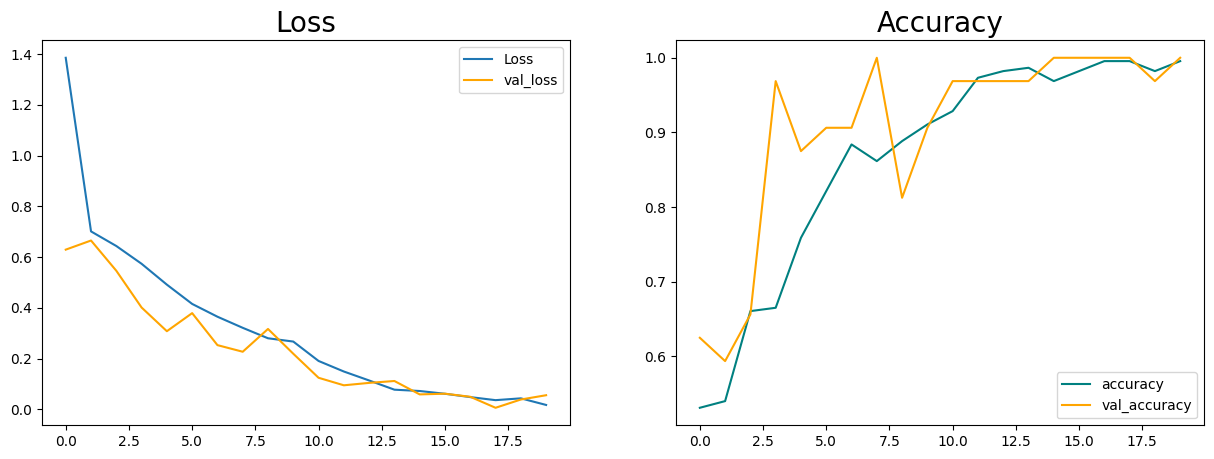

In [47]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
# fig.suptitle('Loss & Accuracy', fontsize=30)

axs[0].plot(hist.history['loss'], label='Loss')
axs[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
axs[0].set_title('Loss',fontsize=20)
axs[0].legend(loc="best")
# plt.show()

axs[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
axs[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
axs[1].set_title('Accuracy',fontsize=20)
axs[1].legend(loc="best")
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X,y = batch
    y_pred = model.predict(X)
    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
